## <center>INTRACRANIAL HEMORRHAGES DATABASE - EXPLORING DATA ANALYSIS (EDA) & DESCRIPTIVE STATISTICS 1 (OUTCOMES)</center>

In this Notebook an Eploratory Data Analysis (EDA) and a Descriptive Statistic Analysis is performed after the following steps:

1. Load data and metadata.
2. Define some useful fuctions for further analysis.
3. Check the pandas datatype and the *a priori* variable type of the dataset variables.
4. Exploring and making a statistical description of the *a priori* outcome variables.
5. Exploring and making a statistical description of the *a priori* predictor variables.

### Import libraries

In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load data and metadata

In [2]:
df= pd.read_hdf('Databases/ICH_database.hdf5')
df_metadata= pd.read_csv('Databases/ICH_database_metadata.csv')
df.head(4)

,patient,sex,hospital,follow_up,final_outcome,nfamily_medhist,tobacco,n_tobacco,drugs,alcohol,...,rdw,mchc,mpv,mch,inr,fibrinogen,maxfibrinogen,time_between_CT_bloodanalysis,age,survival_days
0,1,1,1.0,2.0,2.0,17,2.0,NaN,0,0,...,17.0,33.0,9.0,28.1,4.21,344.0,618.0,0,74,4
1,2,2,2.0,0.0,1.0,4,0.0,0.0,0,0,...,14.7,32.5,10.7,29.8,NaN,NaN,1081.0,0,81,-1000
2,3,2,1.0,0.0,0.0,8,0.0,0.0,0,0,...,14.0,33.1,8.7,30.1,3.16,298.0,470.0,0,78,-1000
3,4,2,1.0,2.0,2.0,8,0.0,0.0,0,0,...,15.8,34.1,7.6,19.3,1.09,344.0,344.0,0,79,7


In [3]:
df_metadata.head(2)

,Variable_Name,Variable_Label,Variable_Definition,R_Datatype,Python_Datatype,Pandas_Datatype,Values,Maximum_Number_of_Different_Values_in_the_Dataset,Comment,Type_of_Variable
0,Patient Number,patient,Patient index,numeric,int,int64,From 1 to 300,300,NaN,Auxiliary
1,SEXO (1-Hombre; 2-Mujer),sex,Patient sex,factor,int,category,1 (Men) or 2 (Women),2,NaN,Predictor


### 2. Define some useful fuctions for further analysis.

In [4]:
# Print all dataframe function

def print_all_dataframe(rows, columns):
    if columns == False or rows == False:
        pd.reset_option('all')
    if columns == True:
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.max_colwidth', None) 
    if rows == True:
        pd.set_option('display.max_rows', None)

In [5]:
#print_all_dataframe(rows=True, columns=True)

In [6]:
# Descriptive statistics

def sdescribe (df, column):
    d1= df.describe()[[column]]
    d2= pd.DataFrame(data={column:[skew(df[column]), kurtosis(df[column])]}, index=['skew', 'kurt'])
    d= pd.concat([d1,d2], axis=0).transpose()
    return d

In [7]:
# Frequency tables with absolute and relative frequencies

def freqtab (df, column, decimals):
    df2= df.copy()
    
    if str(df2[column].dtypes) == 'category':
        df2[column]= df2[column].cat.add_categories('NA')
        table= pd.crosstab(index=df2[column].fillna('NA'), columns='count', dropna=False)
    elif str(df2[column].dtypes) != 'category':
        table= pd.crosstab(index=df2[column].fillna('NA'), columns='count', dropna=False)

    table.rename(columns={'count':'count (n)'}, inplace=True)
    table['percentage (%)']= [float(round((value/sum(table['count (n)'].values.tolist())*100),decimals)) for value in table['count (n)'].values.tolist()]
    total= pd.DataFrame(data=[[sum(table['count (n)'].values.tolist()), sum(table['percentage (%)'].values.tolist())]], columns=table.columns.to_list(), index=['TOTAL'])
    table= pd.concat([table,total], axis=0)
    table= table.rename_axis(column, axis=1)

    return table

In [8]:
# Barplots and boxplots with NA values

def plot(df, x_axis, axis, kind, hue=None):
    df2= df.copy()
    df2[x_axis]= df2[x_axis].cat.add_categories('NA').fillna('NA')
    if kind == 'bars':
        sns.countplot(data=df2, x=x_axis, hue=hue, ax=axis)
    elif kind == 'box':
        sns.boxplot(data=df2, x=x_axis, y=hue, color='#77DD77', ax=axis)

### 3. Check the pandas datatype and the *a priori* variable type of the dataset variables

In [9]:
for column in df.columns:
    print(column, '-'*(30-len(column)) + '>', df[column].dtypes, '-'*(12-len(str(df[column].dtypes))) + '>', df_metadata[df_metadata['Variable_Label'] == column]['Type_of_Variable'].values[0])

patient -----------------------> int64 -------> Auxiliary
sex ---------------------------> category ----> Predictor
hospital ----------------------> category ----> Auxiliary
follow_up ---------------------> category ----> Outcome
final_outcome -----------------> category ----> Outcome
nfamily_medhist ---------------> int64 -------> Predictor
tobacco -----------------------> category ----> Predictor
n_tobacco ---------------------> float64 -----> Predictor
drugs -------------------------> category ----> Predictor
alcohol -----------------------> category ----> Predictor
g_alcohol ---------------------> float64 -----> Predictor
ht ----------------------------> category ----> Predictor
dmellitus ---------------------> category ----> Predictor
dyslipidemia ------------------> category ----> Predictor
previous_ich ------------------> category ----> Predictor
cv_diseases -------------------> category ----> Predictor
carrhythmias ------------------> category ----> Predictor
structural_heart_d

### 4. EDA & Statistical description of the *a priori* outcomes

In [10]:
df_metadata[df_metadata['Type_of_Variable'] == 'Outcome']

,Variable_Name,Variable_Label,Variable_Definition,R_Datatype,Python_Datatype,Pandas_Datatype,Values,Maximum_Number_of_Different_Values_in_the_Dataset,Comment,Type_of_Variable
3,Empeoramiento clínico después del TC (0-no; 1-...,follow_up,Patient follow up during hospitalization,factor,int,category,0 (No deterioration after admission); 1 (Patie...,4,NaN,Outcome
4,Secuelas (0-no; 1-si; 2-si muere a causa del h...,final_outcome,Patient final outcome,factor,int,category,0 (Complete curation); 1 (Curation with sequel...,6,NaN,Outcome
92,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_discharge,Survival to hospitalization discharge,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
93,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_3d,Survival to the following three days after adm...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
94,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_6d,Survival to the following six days after admis...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
95,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_9d,Survival to the following nine days after admi...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
96,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_12d,Survival to the following twelve days after ad...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
97,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_15d,Survival to the following fifteen days after a...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
98,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_1m,Survival to the following month admission in t...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome
99,Supervivencia (0 - no sobrevivió; 1 - sí sobre...,survival_3m,Survival to the following three months after a...,factor,int,category,0 (No); 1 (Yes),2,NaN,Outcome


### 4.1 Outcome 1: follow_up

- 4.1.1 Definition and values
- **4.1.2. Frequency table**
- 4.1.3. Distribution depending on (excluding NA):
    - Cuantitative variables: age, onset_h, platelets, prothrombin_activity, maxfibrinogen
    - Cualitative variables: hospital, sex, cumarinics, primary_ich, traumatic_ich
- 4.1.4. Visualization of relevant distributions

#### 4.1.1 Outcome 1 - follow_up: definition and values

In [11]:
print('Definition:', df_metadata[df_metadata['Variable_Label'] == 'follow_up']['Variable_Definition'].values[0])
print('Values:\n  -', df_metadata[df_metadata['Variable_Label'] == 'follow_up']['Values'].values[0])
print('  - NAs:', df['follow_up'].isnull().values.any())

Definition: Patient follow up during hospitalization
Values:
  - 0 (No deterioration after admission); 1 (Patient deterioration due to the hemorrhage); 2 (Patient death due to the hemorrhage); 3 (Patient deterioration but not due to the hemorrhage); NA (Missing value)
  - NAs: True


#### 4.1.2 Outcome 1 - follow_up: frequency table

In [12]:
freqtab (df, 'follow_up', 2)

follow_up,count (n),percentage (%)
0.0,133,44.33
1.0,66,22.00
2.0,93,31.00
3.0,6,2.00
NA,2,0.67
TOTAL,300,100.00


#### 4.1.3 Outcome 1 - follow_up: distribution depending on other variables (excluding NA)

In [13]:
round(df[['follow_up','age', 'onset_h', 'platelets', 'prothrombin_activity', 'maxfibrinogen']].groupby('follow_up').agg('mean'),2)

,age,onset_h,platelets,prothrombin_activity,maxfibrinogen
follow_up,,,,,
0.0,67.53,79.22,205.55,81.80,560.35
1.0,66.70,21.58,197.08,85.94,740.17
2.0,72.57,22.52,193.41,67.23,577.22
3.0,65.67,35.40,273.33,72.50,619.67


In [14]:
pd.pivot_table(df, values='patient', index=['follow_up','sex'], columns='hospital', aggfunc='count',
               margins=True, margins_name='TOTAL')

hospital       1.0  2.0  3.0  TOTAL
follow_up sex                      
0.0       1     71    5    6     82
          2     38    8    0     46
1.0       1     28    1    3     32
          2     31    0    1     32
2.0       1     47    2    1     50
          2     36    1    0     37
3.0       1      5    0    0      5
          2      1    0    0      1
TOTAL          257   17   11    285

In [15]:
pd.pivot_table(df, values='patient', index='follow_up', columns='cumarinics', aggfunc='count',
               margins=True, margins_name='TOTAL')

cumarinics,0,1,TOTAL
follow_up,,,
0.0,114,19,133
1.0,58,8,66
2.0,64,29,93
3.0,4,2,6
TOTAL,240,58,298


In [16]:
pd.pivot_table(df, values='patient', index='follow_up', columns='primary_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

primary_ich,0,1,TOTAL
follow_up,,,
0.0,83,50,133
1.0,41,25,66
2.0,39,54,93
3.0,4,2,6
TOTAL,167,131,298


In [17]:
pd.pivot_table(df, values='patient', index='follow_up', columns='traumatic_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

traumatic_ich,0,1,TOTAL
follow_up,,,
0.0,69,64,133
1.0,31,35,66
2.0,64,29,93
3.0,2,4,6
TOTAL,166,132,298


#### 4.1.4 Outcome 1 - follow_up: visualization of relevant distributions

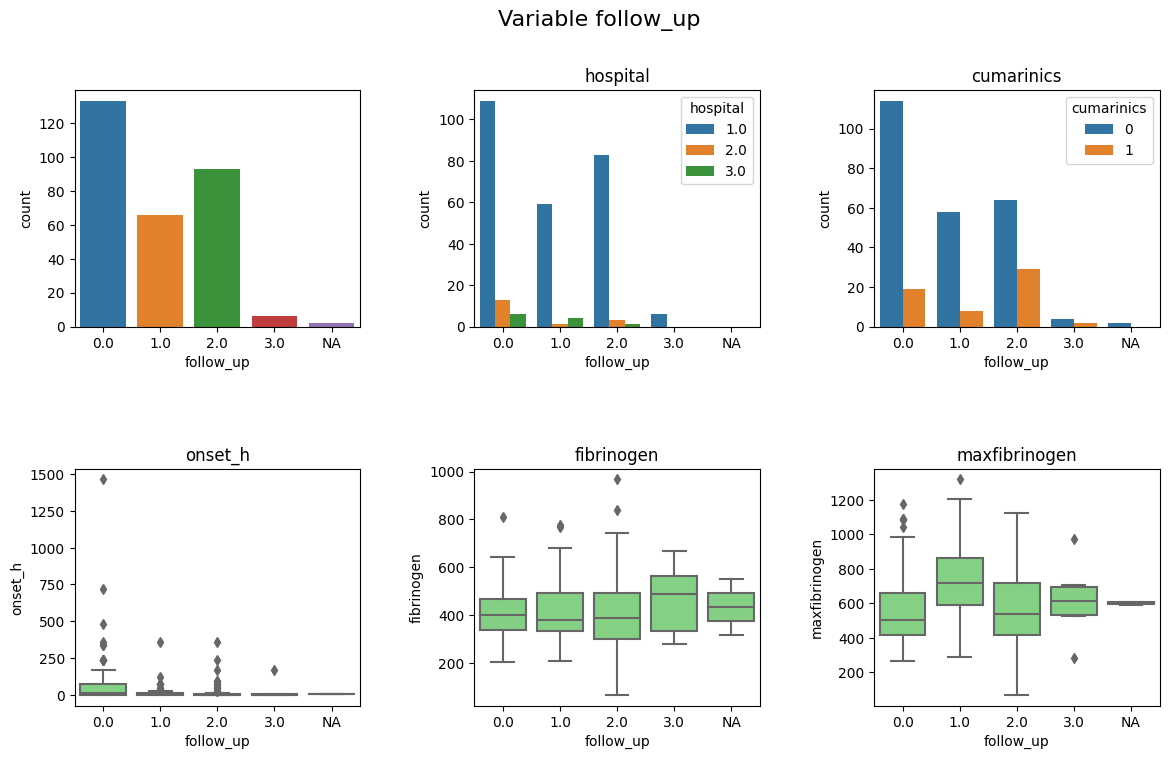

In [18]:
fig_follow_up_hue= [None, 'hospital', 'cumarinics','onset_h','fibrinogen','maxfibrinogen']

fig_follow_up,axs= plt.subplots(nrows=2,ncols=3,figsize=(14,8))
fig_follow_up.suptitle('Variable follow_up', size=16)

counter=0
for i in range(2):
    for j in range(3):
        axs[i,j].set_title(fig_follow_up_hue[counter])
        kind='bars' if i == 0 else 'box'
        plot(df, 'follow_up', axs[i,j], kind, hue=fig_follow_up_hue[counter])
        counter+=1
        
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

<Axes: xlabel='onset_h', ylabel='Count'>

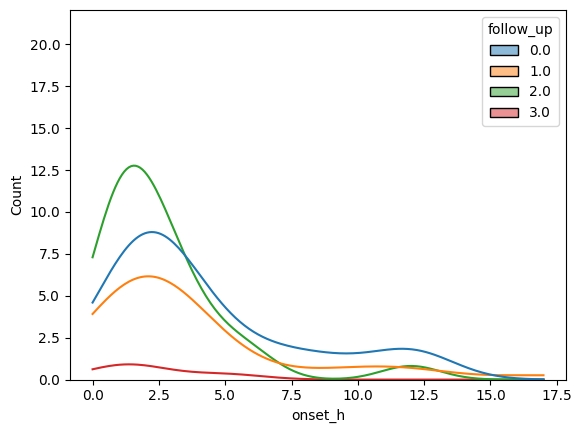

In [19]:
sns.histplot(data=df[(df['onset_h'] < 20)], x='onset_h', kde=True, hue='follow_up', shrink=0.0)

### 4.2 Outcome 2: final_outcome

- 4.2.1 Definition and values
- **4.2.2. Frequency table**
- 4.2.3. Distribution depending on (excluding NA):
    - Cuantitative variables: age, sbp, dbp, bpm, tgcs, prothrombin_activity, maxfibrinogen
    - Cualitative variables: sex, cumarinics, neurol_signs, primary_ich, traumatic_ich
- 4.2.4. Visualization of relevant distributions

#### 4.2.1 Outcome 2 - final_outcome: definition and values

In [20]:
print('Definition:', df_metadata[df_metadata['Variable_Label'] == 'final_outcome']['Variable_Definition'].values[0])
print('Values:\n  -', df_metadata[df_metadata['Variable_Label'] == 'final_outcome']['Values'].values[0])
print('  - NAs:', df['final_outcome'].isnull().values.any())

Definition: Patient final outcome
Values:
  - 0 (Complete curation); 1 (Curation with sequelae); 2 (Hospitalization death due to ICH); 3 (Hospitalization death but not due to ICH); 4 (Death in the next three months after hospital discharge due to ICH); NA (Missing value)
  - NAs: True


#### 4.2.2 Outcome 2 - final_outcome: frequency table

In [21]:
freqtab (df, 'final_outcome', 2)

final_outcome,count (n),percentage (%)
0.0,98,32.67
1.0,96,32.00
2.0,82,27.33
3.0,4,1.33
4.0,4,1.33
NA,16,5.33
TOTAL,300,99.99


#### 4.2.3 Outcome 2 - final_outcome: distribution depending on other variables (excluding NA)

In [22]:
round(df[['final_outcome', 'age', 'sbp', 'dbp', 'bpm', 'tgcs', 'prothrombin_activity', 'maxfibrinogen']].groupby('final_outcome').agg('mean'),2)

,age,sbp,dbp,bpm,tgcs,prothrombin_activity,maxfibrinogen
final_outcome,,,,,,,
0.0,68.08,152.29,84.40,80.16,13.66,83.83,554.76
1.0,65.68,159.48,86.85,76.76,11.82,83.65,694.66
2.0,72.83,162.11,88.07,80.96,7.89,68.61,576.09
3.0,75.75,158.50,80.25,102.75,11.00,66.50,496.25
4.0,79.75,145.00,67.50,86.25,8.00,53.25,548.75


In [23]:
pd.pivot_table(df, values='patient', index='final_outcome', columns='sex', aggfunc='count',
               margins=True, margins_name='TOTAL')

sex,1,2,TOTAL
final_outcome,,,
0.0,62,36,98
1.0,54,42,96
2.0,48,34,82
3.0,3,1,4
4.0,1,3,4
TOTAL,168,116,284


In [24]:
pd.pivot_table(df, values='patient', index='final_outcome', columns='cumarinics', aggfunc='count',
               margins=True, margins_name='TOTAL')

cumarinics,0,1,TOTAL
final_outcome,,,
0.0,86,12,98
1.0,82,14,96
2.0,58,24,82
3.0,3,1,4
4.0,2,2,4
TOTAL,231,53,284


In [25]:
pd.pivot_table(df, values='patient', index='final_outcome', columns='neurol_signs', aggfunc='count',
               margins=True, margins_name='TOTAL')

neurol_signs,0.0,1.0,TOTAL
final_outcome,,,
0.0,31,66,97
1.0,6,90,96
2.0,4,78,82
3.0,1,3,4
4.0,0,4,4
TOTAL,42,241,283


In [26]:
pd.pivot_table(df, values='patient', index='final_outcome', columns='primary_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

primary_ich,0,1,TOTAL
final_outcome,,,
0.0,74,24,98
1.0,47,49,96
2.0,37,45,82
3.0,2,2,4
4.0,1,3,4
TOTAL,161,123,284


In [27]:
pd.pivot_table(df, values='patient', index='final_outcome', columns='traumatic_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

traumatic_ich,0,1,TOTAL
final_outcome,,,
0.0,33,65,98
1.0,64,32,96
2.0,54,28,82
3.0,2,2,4
4.0,3,1,4
TOTAL,156,128,284


#### 4.2.4 Outcome 2 - final_outcome: visualization of relevant distributions

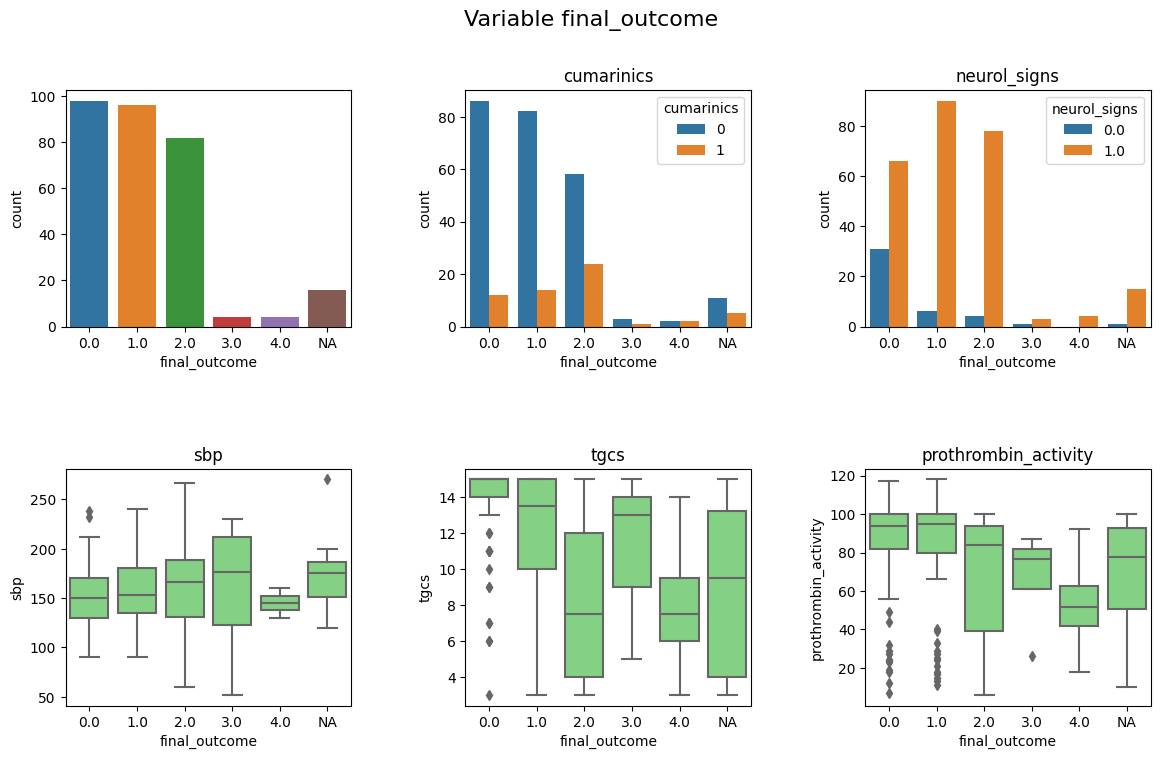

In [28]:
fig_final_outcome_hue= [None, 'cumarinics', 'neurol_signs','sbp','tgcs','prothrombin_activity']

fig_final_outcome,axs= plt.subplots(nrows=2,ncols=3,figsize=(14,8))
fig_final_outcome.suptitle('Variable final_outcome', size=16)

counter=0
for i in range(2):
    for j in range(3):
        axs[i,j].set_title(fig_final_outcome_hue[counter])
        kind='bars' if i == 0 else 'box'
        plot(df, 'final_outcome', axs[i,j], kind, hue=fig_final_outcome_hue[counter])
        counter+=1
        
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

<Axes: xlabel='prothrombin_activity', ylabel='Count'>

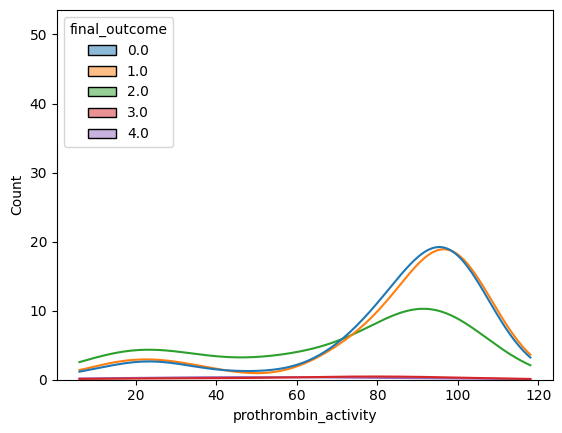

In [29]:
sns.histplot(data=df, x='prothrombin_activity', kde=True, hue='final_outcome', shrink=0.0)

### 4.3 Outcome 3: survivals

- 4.3.1 Definition and values
- **4.3.2. Frequency table** and **descriptive statistics**
- 4.3.3. Distribution depending on (excluding NA):
    - Cuantitative variables: age, sbp, dbp, spo2, bpm, tgcs, prothrombin_activity, maxfibrinogen
    - Cualitative variables: hospital, sex, cumarinics, neurol_signs, primary_ich, traumatic_ich.
- 4.3.4. Visualization of relevant distributions

#### 4.3.1 Outcome 3 - survivals: definition and values

In [30]:
for column in df.columns:
    if column.startswith('surviv'):
        print('Definition:', df_metadata[df_metadata['Variable_Label'] == column]['Variable_Definition'].values[0])
        print('Values:\n  -', df_metadata[df_metadata['Variable_Label'] == column]['Values'].values[0])
        print('  - NAs:', df[column].isnull().values.any(), '\n')

Definition: Survival to hospitalization discharge
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following three days after admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following six days after admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following nine days after admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following twelve days after admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following fifteen days after admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following month admission in the emergency department
Values:
  - 0 (No); 1 (Yes)
  - NAs: False 

Definition: Survival to the following three months after admission in the emergency depa

#### 4.3.2 Outcome 3 - survivals: frequency table (survival_discharge, survived) and descriptive statistics (survival_days)

In [31]:
freqtab (df, 'survival_discharge', 2)

survival_discharge,count (n),percentage (%)
0,91,30.33
1,209,69.67
NA,0,0.00
TOTAL,300,100.00


In [32]:
freqtab (df, 'survived', 2)

survived,count (n),percentage (%)
0,183,61.0
1,117,39.0
NA,0,0.0
TOTAL,300,100.0


In [33]:
round(sdescribe(df[df['survival_days'] >= 0],'survival_days'),2)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
survival_days,183.0,519.49,791.54,0.0,5.5,27.0,811.0,3377.0,1.54,1.32


#### 4.3.3 Outcome 3 - survivals: distribution depending on other variables (excluding NA)

In [34]:
round(df[['survival_discharge','age', 'sbp', 'dbp', 'spo2', 'bpm', 'tgcs', 'prothrombin_activity', 'maxfibrinogen']].groupby('survival_discharge').agg('mean'),2)

,age,sbp,dbp,spo2,bpm,tgcs,prothrombin_activity,maxfibrinogen
survival_discharge,,,,,,,,
0,72.20,159.46,86.41,96.89,82.54,7.92,67.84,576.58
1,67.22,157.96,86.39,96.42,79.10,12.58,82.54,624.70


In [35]:
round(df[['survived','age', 'sbp', 'dbp', 'spo2', 'bpm', 'tgcs', 'prothrombin_activity', 'maxfibrinogen']].groupby('survived').agg('mean'),2)

,age,sbp,dbp,spo2,bpm,tgcs,prothrombin_activity,maxfibrinogen
survived,,,,,,,,
0,73.22,159.75,85.93,96.85,80.48,10.03,71.87,588.48
1,61.71,156.39,87.09,96.12,79.65,12.90,87.82,643.47


In [36]:
pd.pivot_table(df, values='patient', index=['survival_discharge','sex'], columns='hospital', aggfunc='count',
               margins=True, margins_name='TOTAL')

hospital                1.0  2.0  3.0  TOTAL
survival_discharge sex                      
0                  1     47    2    1     50
                   2     34    1    0     35
1                  1    104    6    9    119
                   2     72    8    1     81
TOTAL                   257   17   11    285

In [37]:
pd.pivot_table(df, values='patient', index='survival_discharge', columns='cumarinics', aggfunc='count',
               margins=True, margins_name='TOTAL')

cumarinics,0,1,TOTAL
survival_discharge,,,
0,65,26,91
1,177,32,209
TOTAL,242,58,300


In [38]:
pd.pivot_table(df, values='patient', index='survival_discharge', columns='neurol_signs', aggfunc='count',
               margins=True, margins_name='TOTAL')

neurol_signs,0.0,1.0,TOTAL
survival_discharge,,,
0,5,86,91
1,38,170,208
TOTAL,43,256,299


In [39]:
pd.pivot_table(df, values='patient', index='survival_discharge', columns='primary_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

primary_ich,0,1,TOTAL
survival_discharge,,,
0,39,52,91
1,129,80,209
TOTAL,168,132,300


In [40]:
pd.pivot_table(df, values='patient', index='survival_discharge', columns='traumatic_ich', aggfunc='count',
               margins=True, margins_name='TOTAL')

traumatic_ich,0,1,TOTAL
survival_discharge,,,
0,62,29,91
1,105,104,209
TOTAL,167,133,300


#### 4.3.4 Outcome 3 - survivals: visualization of relevant distributions

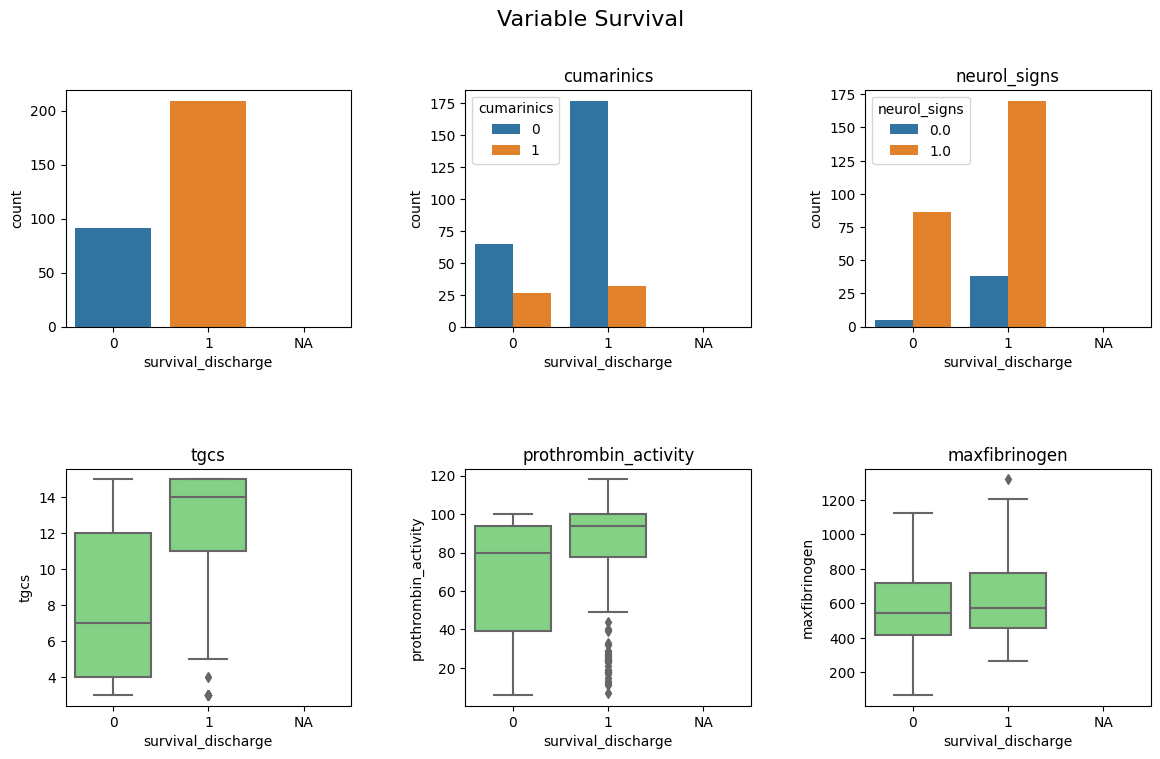

In [41]:
fig_survival1_hue= [None, 'cumarinics', 'neurol_signs','tgcs','prothrombin_activity', 'maxfibrinogen']

fig_survival1,axs= plt.subplots(nrows=2,ncols=3,figsize=(14,8))
fig_survival1.suptitle('Variable Survival', size=16)

counter=0
for i in range(2):
    for j in range(3):
        axs[i,j].set_title(fig_survival1_hue[counter])
        kind='bars' if i == 0 else 'box'
        plot(df, 'survival_discharge', axs[i,j], kind, hue=fig_survival1_hue[counter])
        counter+=1
        
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

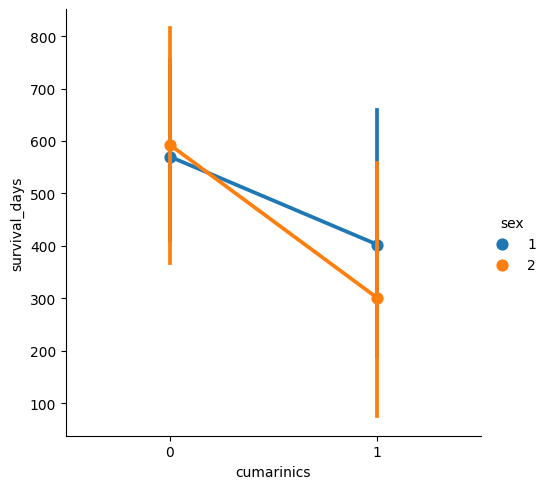

In [42]:
sns.catplot(data=df[df['survival_days'] >= 0], x='cumarinics', y='survival_days', hue='sex', kind='point', errorbar='ci')

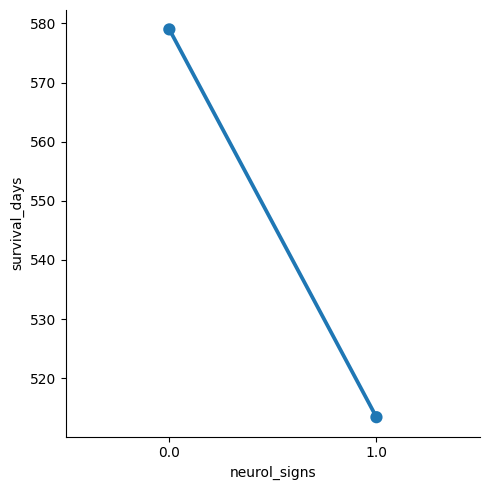

In [43]:
sns.catplot(data=df[df['survival_days'] >= 0], x='neurol_signs', y='survival_days', kind='point', errorbar=None)

### 4.4 Outcome 4: hospitalization_days

- 4.4.1 Definition and values
- **4.4.2. Descriptive statistics**
- 4.4.3. Distribution depending on (excluding NA):
    - Cualitative variables: cumarinics, survival_discharge, primary_ich, traumatic_ich
- 4.4.4. Visualization of relevant distributions

#### 4.4.1 Outcome 4 - hospitalization_days: definition and values

In [44]:
print('Definition:', df_metadata[df_metadata['Variable_Label'] == 'hospitalization_days']['Variable_Definition'].values[0])
print('Values:\n  -', df_metadata[df_metadata['Variable_Label'] == 'hospitalization_days']['Values'].values[0])
print('  - NAs:', df[column].isnull().values.any(), '\n')

Definition: Number of hospitalization days
Values:
  - From 0 to inf
  - NAs: False 



#### 4.4.2 Outcome 4 - hospitalization_days: frequency table

In [45]:
round(sdescribe(df,'hospitalization_days'),2)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
hospitalization_days,300.0,16.93,15.58,1.0,7.0,11.0,23.25,113.0,2.29,7.59


#### 4.4.3 Outcome 4 - hospitalization_days: distribution depending on other variables (excluding NA)

In [46]:
pd.pivot_table(df, values='hospitalization_days', index='cumarinics', aggfunc='mean',
               margins=True, margins_name='TOTAL')

,hospitalization_days
cumarinics,
0,17.066116
1,16.362069
TOTAL,16.930000


In [47]:
pd.pivot_table(df, values='hospitalization_days', index='survival_discharge', aggfunc='mean',
               margins=True, margins_name='TOTAL')

,hospitalization_days
survival_discharge,
0,9.164835
1,20.311005
TOTAL,16.930000


In [48]:
pd.pivot_table(df, values='hospitalization_days', index='primary_ich', aggfunc='mean',
               margins=True, margins_name='TOTAL')

,hospitalization_days
primary_ich,
0,17.547619
1,16.143939
TOTAL,16.930000


In [49]:
pd.pivot_table(df, values='hospitalization_days', index='traumatic_ich', aggfunc='mean',
               margins=True, margins_name='TOTAL')

,hospitalization_days
traumatic_ich,
0,16.964072
1,16.887218
TOTAL,16.930000


#### 4.4.4 Outcome 4 - hospitalization_days: visualization of relevant distributions

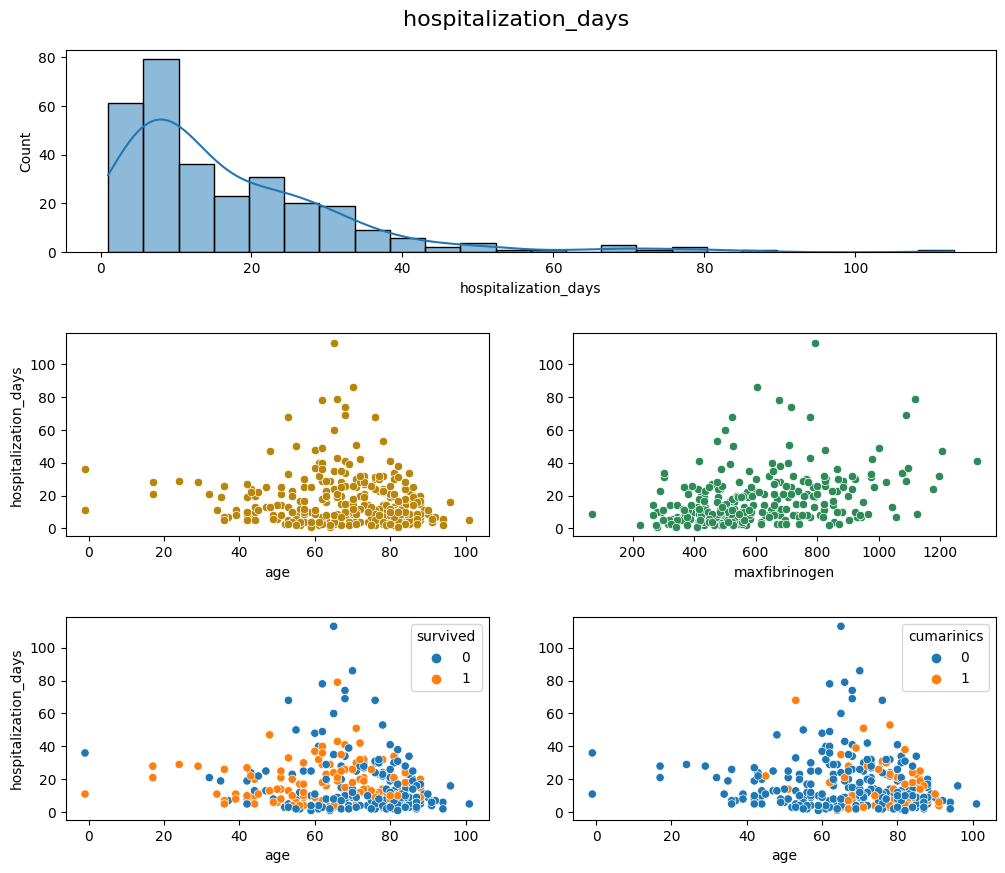

In [50]:
fig_hosp= plt.figure(figsize=(12,10))
fig_hosp.suptitle('hospitalization_days', size=16, y=0.92)

ax1= fig_hosp.add_subplot(3,1,1)
ax2= fig_hosp.add_subplot(3,2,3)
ax3= fig_hosp.add_subplot(3,2,4)
ax4= fig_hosp.add_subplot(3,2,5)
ax5= fig_hosp.add_subplot(3,2,6)

sns.histplot(data=df, x='hospitalization_days', kde=True, ax=ax1)
sns.scatterplot(data=df, x='age', y='hospitalization_days', color='darkgoldenrod', ax=ax2)
sns.scatterplot(data=df, x='age', y='hospitalization_days', hue='survived', ax=ax4)
sns.scatterplot(data=df, x='maxfibrinogen', y='hospitalization_days', color='seagreen', ax=ax3)
sns.scatterplot(data=df, x='age', y='hospitalization_days', hue='cumarinics', color='seagreen', ax=ax5)

ax3.set_ylabel('')
ax5.set_ylabel('')

plt.subplots_adjust(wspace=0.2, hspace=0.4)